# Tarea  3 Inversiones



## Importación de Librerias Relevantes para realizar las distintas operaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de Datos

In [2]:
df = pd.read_excel("MSCI2019Update.xlsx",sheet_name=0,header=0)
bool_rec = pd.read_excel("MSCI2019Update.xlsx",sheet_name=1,header=0)
df.head()


,Date,USA MKT,USA_GROWTH,USA_LARGE,USA_VOLATILITY,USA_MOMENTUM,USA_QUALITY,USA_SMALL,USA_VALUE,RFREE
0,12/31/69,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006517
1,1/30/70,92.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006558
2,2/27/70,98.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005942
3,3/31/70,98.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005525
4,4/30/70,90.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005425


## Limpieza de datos
Detectados presencia de valores faltantes en la tabla de datos entregada. Por tanto, eliminamos toda fila que contenga missing values. Se observa, que dado que el índice **USA_SMALL** no cuenta observaciones antes de 1900. Las observaciones parten desde el dato de diciembre de 1900.
Además, modificamos la columna de fechas ya que  será relevante para incluir la segunda tabla de datos.

In [3]:
df.dropna(inplace=True)
# Se inicializa un vector para almacenar cadenas de largo máximo 5
almc_colum_aux = np.empty(len(df["Date"]),dtype="S5")
fechas_split_mm_dd_yy = df["Date"].str.split("/")
for i in range(len(df["Date"])):
    almc_colum_aux[i] = fechas_split_mm_dd_yy.iloc[i][0]+fechas_split_mm_dd_yy.iloc[i][2]
df["Fecha"] = almc_colum_aux
# Dado que se utilizó un array como almacenacimiento de cadenas de largo 5, se debe transformar la información
#en binario a la codificación correcta

df["Fecha"]=df["Fecha"].apply(lambda x: x.decode("ascii"))


try:
    df.drop(['Date'], axis=1, inplace=True)
except:
    print("Ya se ha eliminado la columna Date")
df.reset_index(drop=True,inplace=True)
df.head()


,USA MKT,USA_GROWTH,USA_LARGE,USA_VOLATILITY,USA_MOMENTUM,USA_QUALITY,USA_SMALL,USA_VALUE,RFREE,Fecha
0,3801.78,3686.25,327.03,628.78,497.64,430.55,100.00,5184.21,0.004808,1200
1,3940.80,3906.14,338.53,620.24,477.78,442.76,105.11,5281.55,0.004292,101
2,3588.65,3350.32,304.27,599.88,439.07,400.43,100.80,5020.57,0.004067,201
3,3359.87,3053.41,282.87,572.91,405.25,372.42,98.06,4821.68,0.003683,301
4,3621.65,3333.19,305.40,604.41,434.72,397.63,104.46,5136.37,0.003225,401


# Parte 1

### a) Generación de retornos aritméticos de los índices
Se observa que se perderá la observación de Diciembre de 1900. Por tanto, los datos relevantes partirán desde Enero de 1901.

Se incorporan las columnas con los retornos al dataframe relevante.

Discmr: Esta celda debe ser corrida solo una vez para evitar mal funcionamiento

In [4]:
data_pct = df.iloc[:,0:-1].pct_change()
col_pct = [ x + "_pct_change" for x in list(df.columns[0:-1])]
df[col_pct] = data_pct
df

,USA MKT,USA_GROWTH,USA_LARGE,USA_VOLATILITY,USA_MOMENTUM,USA_QUALITY,USA_SMALL,USA_VALUE,RFREE,Fecha,USA MKT_pct_change,USA_GROWTH_pct_change,USA_LARGE_pct_change,USA_VOLATILITY_pct_change,USA_MOMENTUM_pct_change,USA_QUALITY_pct_change,USA_SMALL_pct_change,USA_VALUE_pct_change,RFREE_pct_change
0,3801.78,3686.25,327.03,628.78,497.64,430.55,100.00,5184.21,0.004808,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3940.80,3906.14,338.53,620.24,477.78,442.76,105.11,5281.55,0.004292,101,0.036567,0.059651,0.035165,-0.013582,-0.039908,0.028359,0.051100,0.018776,-0.107452
2,3588.65,3350.32,304.27,599.88,439.07,400.43,100.80,5020.57,0.004067,201,-0.089360,-0.142294,-0.101202,-0.032826,-0.081021,-0.095605,-0.041005,-0.049414,-0.052427
3,3359.87,3053.41,282.87,572.91,405.25,372.42,98.06,4821.68,0.003683,301,-0.063751,-0.088621,-0.070332,-0.044959,-0.077026,-0.069950,-0.027183,-0.039615,-0.094262
4,3621.65,3333.19,305.40,604.41,434.72,397.63,104.46,5136.37,0.003225,401,0.077914,0.091629,0.079648,0.054982,0.072721,0.067692,0.065266,0.065266,-0.124434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,12244.45,12987.59,993.34,2776.69,2459.57,1766.67,534.22,14760.21,0.001625,819,-0.017390,-0.009060,-0.015403,0.016674,0.002785,-0.014064,-0.041586,-0.025971,-0.071429
225,12462.25,13003.39,1010.06,2801.98,2429.81,1790.24,543.58,15279.42,0.001575,919,0.017788,0.001217,0.016832,0.009108,-0.012100,0.013341,0.017521,0.035176,-0.030769
226,12733.56,13381.23,1033.55,2797.21,2445.01,1844.59,553.33,15498.89,0.001375,1019,0.021771,0.029057,0.023256,-0.001702,0.006256,0.030359,0.017937,0.014364,-0.126984
227,13212.26,13984.08,1072.68,2834.37,2527.41,1925.07,575.57,15962.88,0.001283,1119,0.037594,0.045052,0.037860,0.013285,0.033701,0.043630,0.040193,0.029937,-0.066667


## b) Construcción de Factores

In [5]:
df["MKT"]= df["USA MKT_pct_change"] - df["RFREE_pct_change"]
df["VAL"] = df["USA_VALUE_pct_change"] - df["USA_GROWTH_pct_change"]
df["CAP"] = df["USA_SMALL_pct_change"] - df["USA_LARGE_pct_change"]
df["MOM"] = df["USA_MOMENTUM_pct_change"] - df["USA MKT_pct_change"]
df["QUA"] = df["USA_QUALITY_pct_change"] - df["USA MKT_pct_change"]
df["VOL"] = df["USA_VOLATILITY_pct_change"] - df["USA MKT_pct_change"]

## c) Estadística Descriptiva

In [6]:
df[["MKT","VAL","CAP","MOM","QUA","VOL"]].apply(['mean','std','skew','kurtosis','autocorr']).transpose()

,mean,std,skew,kurtosis,autocorr
MKT,-0.053483,0.514670,-5.823491,46.276816,0.155868
VAL,-0.001032,0.021526,0.264966,2.003250,0.077668
CAP,0.003053,0.026402,0.317229,0.417078,-0.093447
MOM,0.001638,0.021683,-0.705983,2.664602,-0.042162
QUA,0.001007,0.010232,0.200961,0.501654,0.162501
VOL,0.000738,0.017775,0.435931,1.206949,0.014708


## Gráfico de Rentabilidad Acumulada de cada Factor

Realizaremos el cruce de ambas tablas con mediante la columna de la fecha de cada tabla. Ajustaremos ambas fechas para realizar la operación join

In [7]:
bool_rec["yyyymm"]=bool_rec["yyyymm"].apply(str).apply(lambda x: x[-4:][-2:]+x[-4:][-4:-2])
bool_rec.set_index(bool_rec["yyyymm"],drop=True)

# rellenamos con un 0 los meses de la primera tabla que sean inferiores al valor 10 ya que tendrán formato MYY.
# Se necesita MMYY
df["Fecha"]=df["Fecha"].apply(lambda x : "0" + x if len(x)==3 else x ) 

In [8]:

# se juntan los dos dataframes por indice
df=pd.merge(df,bool_rec,left_on="Fecha",right_on="yyyymm",how="inner")
df

,USA MKT,USA_GROWTH,USA_LARGE,USA_VOLATILITY,USA_MOMENTUM,USA_QUALITY,USA_SMALL,USA_VALUE,RFREE,Fecha,...,USA_VALUE_pct_change,RFREE_pct_change,MKT,VAL,CAP,MOM,QUA,VOL,yyyymm,usrec
0,3801.78,3686.25,327.03,628.78,497.64,430.55,100.00,5184.21,0.004808,1200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200,0
1,3940.80,3906.14,338.53,620.24,477.78,442.76,105.11,5281.55,0.004292,0101,...,0.018776,-0.107452,0.144019,-0.040875,0.015935,-0.076475,-0.008208,-0.050149,0101,0
2,3588.65,3350.32,304.27,599.88,439.07,400.43,100.80,5020.57,0.004067,0201,...,-0.049414,-0.052427,-0.036933,0.092880,0.060198,0.008339,-0.006245,0.056534,0201,0
3,3359.87,3053.41,282.87,572.91,405.25,372.42,98.06,4821.68,0.003683,0301,...,-0.039615,-0.094262,0.030511,0.049006,0.043150,-0.013275,-0.006199,0.018792,0301,1
4,3621.65,3333.19,305.40,604.41,434.72,397.63,104.46,5136.37,0.003225,0401,...,0.065266,-0.124434,0.202348,-0.026363,-0.014382,-0.005193,-0.010221,-0.022931,0401,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,12244.45,12987.59,993.34,2776.69,2459.57,1766.67,534.22,14760.21,0.001625,0819,...,-0.025971,-0.071429,0.054039,-0.016911,-0.026183,0.020175,0.003327,0.034064,0819,0
225,12462.25,13003.39,1010.06,2801.98,2429.81,1790.24,543.58,15279.42,0.001575,0919,...,0.035176,-0.030769,0.048557,0.033960,0.000689,-0.029887,-0.004446,-0.008680,0919,0
226,12733.56,13381.23,1033.55,2797.21,2445.01,1844.59,553.33,15498.89,0.001375,1019,...,0.014364,-0.126984,0.148755,-0.014693,-0.005319,-0.015515,0.008589,-0.023473,1019,0
227,13212.26,13984.08,1072.68,2834.37,2527.41,1925.07,575.57,15962.88,0.001283,1119,...,0.029937,-0.066667,0.104260,-0.015115,0.002333,-0.003892,0.006037,-0.024309,1119,0


In [9]:
def Retornos_Acum(Serie):
    retornos_acumulados = np.empty([len(Serie),1],dtype=float)
    for i in range(len(Serie)):
        if i==0:
            retornos_acumulados[i]=1
        else:
            retornos_acumulados[i]=retornos_acumulados[i-1]*(1+Serie[i])
            
    return retornos_acumulados

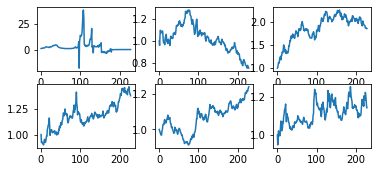

In [10]:
# Para MKT
df["Ret_MKT"]=Retornos_Acum(df["MKT"])
df["Ret_VAL"]=Retornos_Acum(df["VAL"])
df["Ret_CAP"]=Retornos_Acum(df["CAP"])
df["Ret_MOM"]=Retornos_Acum(df["MOM"])
df["Ret_QUA"]=Retornos_Acum(df["QUA"])
df["Ret_VOL"]=Retornos_Acum(df["VOL"])
# Gráficos
fig=plt.figure()
ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,2)
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,4)
ax5=fig.add_subplot(3,3,5)
ax6=fig.add_subplot(3,3,6)

ax1.plot(df["Ret_MKT"])
ax2.plot(df["Ret_VAL"])
ax3.plot(df["Ret_CAP"])
ax4.plot(df["Ret_MOM"])
ax5.plot(df["Ret_QUA"])
ax6.plot(df["Ret_VOL"])

### Significancia de las Correlaciones entre Factores

In [31]:
columnas_relevantes=["MKT","VAL","CAP","MOM","QUA","VOL"]
corr_fact=df.loc[1:,columnas_relevantes].corr()
corr_fact

,MKT,VAL,CAP,MOM,QUA,VOL
MKT,1.000000,0.172244,-0.043331,-0.031377,-0.056697,0.065874
VAL,0.172244,1.000000,0.058844,-0.289133,-0.379053,0.292185
CAP,-0.043331,0.058844,1.000000,0.032460,-0.440060,-0.260048
MOM,-0.031377,-0.289133,0.032460,1.000000,0.161585,0.315191
QUA,-0.056697,-0.379053,-0.440060,0.161585,1.000000,0.306476
VOL,0.065874,0.292185,-0.260048,0.315191,0.306476,1.000000


### Test de Significancia diferencia de correlaciones
Denominando $\rho_{i,j}$ como el valor del correlación poblacional entros dos series $i,j$ con $n$ observaciones. Se define $\hat{\rho}_{i,j}$ su estimador muestral. Entonces, para testear la hipótesis:
$$H_o : \rho_{i,j} = 0 $$
$$H_1 : \rho_{i,j} \neq 0 $$
Se utiliza el estadístico : $ t_{i,j} = \hat{\rho}_{i,j} * \sqrt{(n-2)/(1-\hat{\rho}_{i,j} ^2)} $ 
Que tendrá distribución t-student con n-2 grados de libertad

In [37]:
# Preallocation de resultados
sign_corr = np.empty(corr_fact.shape)
sign_corr[:]=np.nan
n=len(df.loc[1:,"MKT"])
for i in range(corr_fact.shape[0]):
    for j in range(i+1,corr_fact.shape[0]):
        corr=corr_fact.iloc[i,j]
        est_t=corr * np.sqrt((n-2)/(1-corr**2))
        #Utilizamos la aproximación normal de la t-student para definir 
        # el crítico a un nivel de significancia del 95% en 1.96
        if abs(est_t) >= 1.96:
            sign_corr[i,j]=1
        else:
            sign_corr[i,j]=0
sign_corr

array([[nan,  1.,  0.,  0.,  0.,  0.],
       [nan, nan,  0.,  1.,  1.,  1.],
       [nan, nan, nan,  0.,  1.,  1.],
       [nan, nan, nan, nan,  1.,  1.],
       [nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan]])

[0, 1, 2, 3, 4, 5]